In [17]:
spacex_df['Launch Site'].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)

In [47]:
import pandas as pd
import dash
from dash import html as html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

path=r'C:\Users\Ali\Desktop\spacex_launch_dash.csv'
# Read the airline data into pandas dataframe
spacex_df = pd.read_csv(path)
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

display(spacex_df.head(5))
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[
                                html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='id1',
                                             options=[{'label': 'All Sites', 'value': 'ALL'},
                                                      {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                      {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                      {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                      {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}, ],
                                             value='ALL',
                                             placeholder="place holder here",
                                             searchable=True ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                # Function decorator to specify function input and output

                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range

                                dcc.RangeSlider(id='id2',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0',
                                                       100: '100'},
                                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              [Input(component_id='id1', component_property='value'),
               Input(component_id='id2', component_property='value')])
def get_pie_chart(entered_site, selected_range):
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= selected_range[0]) &
                             (spacex_df['Payload Mass (kg)'] <= selected_range[1])]
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', names='Launch Site', title='Launch Site Success')
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]

        fig = px.pie(filtered_df, values=filtered_df['class'].value_counts().values,names=filtered_df['class'].value_counts().index,title='Success vs. Failed')
    return fig

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='id1', component_property='value'),
               Input(component_id='id2', component_property='value')])
def scatter(entered_site, selected_range):
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= selected_range[0]) &
                             (spacex_df['Payload Mass (kg)'] <= selected_range[1])]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Launch Site')
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='class')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server()


,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


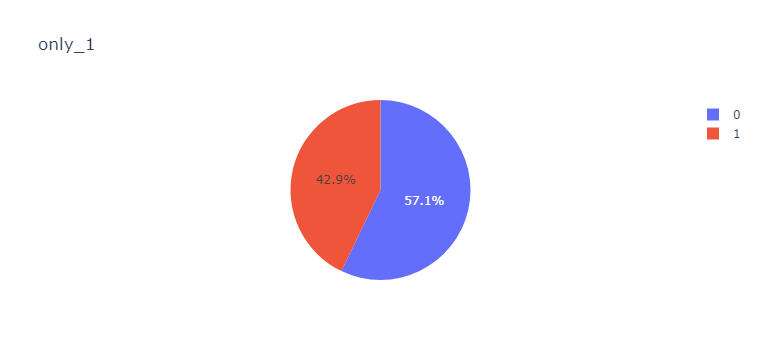

In [38]:
fig = px.pie( spacex_df[ spacex_df['Launch Site']== 'CCAFS LC-40'], values=spacex_df['class'].value_counts().values , names=spacex_df['class'].value_counts().index, 
                 title='only_1')  
fig

In [43]:
spacex_df['class'].value_counts().values 
spacex_df['class'].value_counts().index

Index([0, 1], dtype='int64', name='class')

In [45]:
spacex_df['Launch Site'].unique()

array(['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40'],
      dtype=object)